In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, f1_score, recall_score

from Models.model import *
from utils.utils import *
from utils.Visualization import *

import torch
from tqdm import tqdm

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [18]:
data_path = '../data/[24-2 DS_Project2] Data.csv'
df = pd.read_csv(data_path)

In [56]:
num_epochs = 100
batch_size = 128
lr = 1e-4

In [20]:
cat_features = ['Gender', 'Card Brand', 'Card Type', 'Expires', 'Has Chip', 'Year PIN last Changed', 'Whether Security Chip is Used', 'Day', 'Error Message']

num_features = ['Current Age', 'Retirement Age', 'Per Capita Income - Zipcode', 'Yearly Income', 'Total Debt', 'Credit Score', 'Credit Limit', 'Amount','Since Open Month']

discarded = ['User', 'Birth Year', 'Birth Month', 'Card', 'Card Number', 'Zipcode', 'Merchandise Code', 'Acct Open Date', 'Year', 'Month']

In [21]:
(train_cat_X, train_num_X, train_y), (valid_cat_X, valid_num_X, valid_y), label_encoders = dt_process_data(
    data_path,
    cat_features,
    num_features,
    discarded
)


TRANSITION
IQR
SPLIT
DISCARD
SCALE
ENCODE
TARGET
TRAIN CAT/NUM
VALID CAT/NUM
RETURN


In [68]:
print(train_y.value_counts())
print(valid_y.value_counts())
print(train_y.shape())

Is Fraud?
0.0          896343
1.0            1130
Name: count, dtype: int64
Is Fraud?
0.0          306155
1.0             484
Name: count, dtype: int64


TypeError: 'tuple' object is not callable

In [46]:
class BaseDataset(Dataset):
    def __init__(self, cat_features, num_features, y, device):
        self.cat_features = torch.tensor(cat_features.values, dtype=torch.long).to(device)
        self.num_features = torch.tensor(num_features.values, dtype=torch.float).to(device)
        self.y = torch.tensor(y.values, dtype=torch.float).to(device)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        return self.cat_features[index], self.num_features[index], self.y[index]

In [47]:
train_dataset = BaseDataset(train_cat_X, train_num_X, y=train_y, device=device)
valid_dataset = BaseDataset(valid_cat_X, valid_num_X, y=valid_y, device=device)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

In [52]:
#Base 모델 정의
encoding_dim = 32
model = BaseModel(encoding_dim, cat_features, num_features, 1).to(device)

criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [67]:
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0

    train_preds = []
    train_labels = []

    # 학습
    for batch in tqdm(train_loader, desc=f"Epoch {epoch + 1}/{num_epochs}"):
        cat_x, num_x, y = batch

        optimizer.zero_grad()
        output = model(cat_x.to(device), num_x.to(device)).squeeze(1)
        y = y.view(-1)
        loss = criterion(output, y.to(device))

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        preds = torch.sigmoid(output.detach()).cpu().numpy() # 확률값
        preds = (preds > 0.5).astype(int)  # 0.5 기준으로 클래스 결정
        train_preds.extend(preds)
        train_labels.extend(y.cpu().numpy())

    #결과 출력
    train_accuracy = accuracy_score(train_labels, train_preds)
    train_f1 = f1_score(train_labels, train_preds, average='weighted')
    train_recall = recall_score(train_labels, train_preds, average='weighted')
    print(f"Epoch {epoch + 1}/{num_epochs} - Train Loss: {epoch_loss:.4f} - Train Acc: {train_accuracy:.4f} - Train F1: {train_f1:.4f} - Train Recall: {train_recall:.4f}")



Epoch 1/100: 100%|██████████| 7012/7012 [00:19<00:00, 357.39it/s]


Epoch 1/100 - Train Loss: 50.4810 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 2/100: 100%|██████████| 7012/7012 [00:19<00:00, 361.94it/s]


Epoch 2/100 - Train Loss: 49.5870 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 3/100: 100%|██████████| 7012/7012 [00:19<00:00, 358.89it/s]


Epoch 3/100 - Train Loss: 48.5583 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 4/100: 100%|██████████| 7012/7012 [00:20<00:00, 335.20it/s]


Epoch 4/100 - Train Loss: 47.7735 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 5/100: 100%|██████████| 7012/7012 [00:20<00:00, 341.79it/s]


Epoch 5/100 - Train Loss: 47.0573 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 6/100: 100%|██████████| 7012/7012 [00:19<00:00, 353.16it/s]


Epoch 6/100 - Train Loss: 46.0277 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 7/100: 100%|██████████| 7012/7012 [00:19<00:00, 353.81it/s]


Epoch 7/100 - Train Loss: 45.2869 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 8/100: 100%|██████████| 7012/7012 [00:19<00:00, 352.02it/s]


Epoch 8/100 - Train Loss: 44.4340 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 9/100: 100%|██████████| 7012/7012 [00:19<00:00, 362.86it/s]


Epoch 9/100 - Train Loss: 43.6054 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 10/100: 100%|██████████| 7012/7012 [00:19<00:00, 355.26it/s]


Epoch 10/100 - Train Loss: 43.1036 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 11/100: 100%|██████████| 7012/7012 [00:20<00:00, 340.92it/s]


Epoch 11/100 - Train Loss: 42.1774 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 12/100: 100%|██████████| 7012/7012 [00:20<00:00, 345.50it/s]


Epoch 12/100 - Train Loss: 41.3104 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 13/100: 100%|██████████| 7012/7012 [00:20<00:00, 345.01it/s]


Epoch 13/100 - Train Loss: 40.8255 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 14/100: 100%|██████████| 7012/7012 [00:20<00:00, 346.48it/s]


Epoch 14/100 - Train Loss: 40.2216 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 15/100: 100%|██████████| 7012/7012 [00:21<00:00, 320.06it/s]


Epoch 15/100 - Train Loss: 39.7432 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 16/100: 100%|██████████| 7012/7012 [00:20<00:00, 345.75it/s]


Epoch 16/100 - Train Loss: 39.2198 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 17/100: 100%|██████████| 7012/7012 [00:19<00:00, 352.89it/s]


Epoch 17/100 - Train Loss: 38.6925 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 18/100: 100%|██████████| 7012/7012 [00:20<00:00, 343.97it/s]


Epoch 18/100 - Train Loss: 38.3159 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 19/100: 100%|██████████| 7012/7012 [00:21<00:00, 327.38it/s]


Epoch 19/100 - Train Loss: 37.8517 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 20/100: 100%|██████████| 7012/7012 [00:20<00:00, 338.35it/s]


Epoch 20/100 - Train Loss: 37.4826 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 21/100: 100%|██████████| 7012/7012 [00:20<00:00, 342.54it/s]


Epoch 21/100 - Train Loss: 37.2137 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 22/100: 100%|██████████| 7012/7012 [00:20<00:00, 345.83it/s]


Epoch 22/100 - Train Loss: 36.6747 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 23/100: 100%|██████████| 7012/7012 [00:20<00:00, 335.51it/s]


Epoch 23/100 - Train Loss: 36.4074 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 24/100: 100%|██████████| 7012/7012 [00:20<00:00, 336.24it/s]


Epoch 24/100 - Train Loss: 36.1878 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 25/100: 100%|██████████| 7012/7012 [00:20<00:00, 337.15it/s]


Epoch 25/100 - Train Loss: 35.8350 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 26/100: 100%|██████████| 7012/7012 [00:19<00:00, 359.62it/s]


Epoch 26/100 - Train Loss: 35.8181 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 27/100: 100%|██████████| 7012/7012 [00:19<00:00, 360.95it/s]


Epoch 27/100 - Train Loss: 35.5128 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 28/100: 100%|██████████| 7012/7012 [00:19<00:00, 363.96it/s]


Epoch 28/100 - Train Loss: 35.2200 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 29/100: 100%|██████████| 7012/7012 [00:19<00:00, 362.12it/s]


Epoch 29/100 - Train Loss: 34.9715 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 30/100: 100%|██████████| 7012/7012 [00:19<00:00, 361.54it/s]


Epoch 30/100 - Train Loss: 34.7614 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 31/100: 100%|██████████| 7012/7012 [00:19<00:00, 365.07it/s]


Epoch 31/100 - Train Loss: 34.6117 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 32/100: 100%|██████████| 7012/7012 [00:19<00:00, 361.43it/s]


Epoch 32/100 - Train Loss: 34.2087 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 33/100: 100%|██████████| 7012/7012 [00:19<00:00, 358.18it/s]


Epoch 33/100 - Train Loss: 34.1629 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 34/100: 100%|██████████| 7012/7012 [00:21<00:00, 328.38it/s]


Epoch 34/100 - Train Loss: 34.2452 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 35/100: 100%|██████████| 7012/7012 [00:20<00:00, 348.21it/s]


Epoch 35/100 - Train Loss: 33.8409 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 36/100: 100%|██████████| 7012/7012 [00:20<00:00, 344.44it/s]


Epoch 36/100 - Train Loss: 33.7214 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 37/100: 100%|██████████| 7012/7012 [00:19<00:00, 360.01it/s]


Epoch 37/100 - Train Loss: 33.7563 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 38/100: 100%|██████████| 7012/7012 [00:19<00:00, 364.29it/s]


Epoch 38/100 - Train Loss: 33.4123 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 39/100: 100%|██████████| 7012/7012 [00:21<00:00, 321.78it/s]


Epoch 39/100 - Train Loss: 33.1413 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 40/100: 100%|██████████| 7012/7012 [00:20<00:00, 350.53it/s]


Epoch 40/100 - Train Loss: 33.1574 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 41/100: 100%|██████████| 7012/7012 [00:19<00:00, 351.63it/s]


Epoch 41/100 - Train Loss: 32.9592 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 42/100: 100%|██████████| 7012/7012 [00:21<00:00, 328.66it/s]


Epoch 42/100 - Train Loss: 32.7482 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 43/100: 100%|██████████| 7012/7012 [00:20<00:00, 345.50it/s]


Epoch 43/100 - Train Loss: 32.5592 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 44/100: 100%|██████████| 7012/7012 [00:20<00:00, 344.91it/s]


Epoch 44/100 - Train Loss: 32.7178 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 45/100: 100%|██████████| 7012/7012 [00:19<00:00, 355.56it/s]


Epoch 45/100 - Train Loss: 32.3369 - Train Acc: 0.9988 - Train F1: 0.9981 - Train Recall: 0.9988


Epoch 46/100: 100%|██████████| 7012/7012 [00:20<00:00, 349.50it/s]


Epoch 46/100 - Train Loss: 32.5369 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 47/100: 100%|██████████| 7012/7012 [00:19<00:00, 354.30it/s]


Epoch 47/100 - Train Loss: 32.0218 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 48/100: 100%|██████████| 7012/7012 [00:20<00:00, 346.65it/s]


Epoch 48/100 - Train Loss: 32.0187 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 49/100: 100%|██████████| 7012/7012 [00:19<00:00, 358.89it/s]


Epoch 49/100 - Train Loss: 31.7510 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 50/100: 100%|██████████| 7012/7012 [00:19<00:00, 352.67it/s]


Epoch 50/100 - Train Loss: 31.6542 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 51/100: 100%|██████████| 7012/7012 [00:20<00:00, 344.24it/s]


Epoch 51/100 - Train Loss: 31.7409 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 52/100: 100%|██████████| 7012/7012 [00:20<00:00, 343.54it/s]


Epoch 52/100 - Train Loss: 31.4900 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 53/100: 100%|██████████| 7012/7012 [00:20<00:00, 347.11it/s]


Epoch 53/100 - Train Loss: 31.3086 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 54/100: 100%|██████████| 7012/7012 [00:20<00:00, 344.02it/s]


Epoch 54/100 - Train Loss: 31.3748 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 55/100: 100%|██████████| 7012/7012 [00:21<00:00, 333.64it/s]


Epoch 55/100 - Train Loss: 31.1809 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 56/100: 100%|██████████| 7012/7012 [00:20<00:00, 339.15it/s]


Epoch 56/100 - Train Loss: 31.1508 - Train Acc: 0.9988 - Train F1: 0.9981 - Train Recall: 0.9988


Epoch 57/100: 100%|██████████| 7012/7012 [00:21<00:00, 329.91it/s]


Epoch 57/100 - Train Loss: 31.1085 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 58/100: 100%|██████████| 7012/7012 [00:20<00:00, 341.20it/s]


Epoch 58/100 - Train Loss: 30.8684 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 59/100: 100%|██████████| 7012/7012 [00:21<00:00, 324.99it/s]


Epoch 59/100 - Train Loss: 30.6723 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 60/100: 100%|██████████| 7012/7012 [00:23<00:00, 293.51it/s]


Epoch 60/100 - Train Loss: 30.9329 - Train Acc: 0.9987 - Train F1: 0.9982 - Train Recall: 0.9987


Epoch 61/100: 100%|██████████| 7012/7012 [00:24<00:00, 291.61it/s]


Epoch 61/100 - Train Loss: 30.5594 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 62/100: 100%|██████████| 7012/7012 [00:24<00:00, 292.06it/s]


Epoch 62/100 - Train Loss: 30.4018 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 63/100: 100%|██████████| 7012/7012 [00:21<00:00, 327.11it/s]


Epoch 63/100 - Train Loss: 30.5240 - Train Acc: 0.9987 - Train F1: 0.9981 - Train Recall: 0.9987


Epoch 64/100: 100%|██████████| 7012/7012 [00:22<00:00, 313.61it/s]


Epoch 64/100 - Train Loss: 30.3523 - Train Acc: 0.9987 - Train F1: 0.9982 - Train Recall: 0.9987


Epoch 65/100: 100%|██████████| 7012/7012 [00:21<00:00, 321.75it/s]


Epoch 65/100 - Train Loss: 30.0391 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 66/100: 100%|██████████| 7012/7012 [00:22<00:00, 312.64it/s]


Epoch 66/100 - Train Loss: 30.1145 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 67/100: 100%|██████████| 7012/7012 [00:22<00:00, 313.11it/s]


Epoch 67/100 - Train Loss: 29.7917 - Train Acc: 0.9987 - Train F1: 0.9982 - Train Recall: 0.9987


Epoch 68/100: 100%|██████████| 7012/7012 [00:22<00:00, 305.90it/s]


Epoch 68/100 - Train Loss: 29.8720 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 69/100: 100%|██████████| 7012/7012 [00:22<00:00, 318.14it/s]


Epoch 69/100 - Train Loss: 29.8629 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 70/100: 100%|██████████| 7012/7012 [00:23<00:00, 303.71it/s]


Epoch 70/100 - Train Loss: 29.8036 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 71/100: 100%|██████████| 7012/7012 [00:22<00:00, 310.52it/s]


Epoch 71/100 - Train Loss: 29.6511 - Train Acc: 0.9987 - Train F1: 0.9982 - Train Recall: 0.9987


Epoch 72/100: 100%|██████████| 7012/7012 [00:20<00:00, 341.43it/s]


Epoch 72/100 - Train Loss: 29.8273 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 73/100: 100%|██████████| 7012/7012 [00:21<00:00, 331.17it/s]


Epoch 73/100 - Train Loss: 29.3932 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 74/100: 100%|██████████| 7012/7012 [00:21<00:00, 319.74it/s]


Epoch 74/100 - Train Loss: 29.4263 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 75/100: 100%|██████████| 7012/7012 [00:21<00:00, 332.37it/s]


Epoch 75/100 - Train Loss: 29.2092 - Train Acc: 0.9987 - Train F1: 0.9982 - Train Recall: 0.9987


Epoch 76/100: 100%|██████████| 7012/7012 [00:21<00:00, 326.22it/s]


Epoch 76/100 - Train Loss: 29.3193 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 77/100: 100%|██████████| 7012/7012 [00:21<00:00, 320.07it/s]


Epoch 77/100 - Train Loss: 29.1746 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 78/100: 100%|██████████| 7012/7012 [00:22<00:00, 311.81it/s]


Epoch 78/100 - Train Loss: 29.0652 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 79/100: 100%|██████████| 7012/7012 [00:21<00:00, 321.16it/s]


Epoch 79/100 - Train Loss: 28.8447 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 80/100: 100%|██████████| 7012/7012 [00:22<00:00, 315.60it/s]


Epoch 80/100 - Train Loss: 28.8520 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 81/100: 100%|██████████| 7012/7012 [00:21<00:00, 320.71it/s]


Epoch 81/100 - Train Loss: 28.6804 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 82/100: 100%|██████████| 7012/7012 [00:22<00:00, 317.16it/s]


Epoch 82/100 - Train Loss: 28.8141 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 83/100: 100%|██████████| 7012/7012 [00:22<00:00, 315.76it/s]


Epoch 83/100 - Train Loss: 28.8082 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 84/100: 100%|██████████| 7012/7012 [00:24<00:00, 281.62it/s]


Epoch 84/100 - Train Loss: 28.5849 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 85/100: 100%|██████████| 7012/7012 [00:19<00:00, 358.68it/s]


Epoch 85/100 - Train Loss: 28.4327 - Train Acc: 0.9987 - Train F1: 0.9982 - Train Recall: 0.9987


Epoch 86/100: 100%|██████████| 7012/7012 [00:19<00:00, 360.79it/s]


Epoch 86/100 - Train Loss: 28.4911 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 87/100: 100%|██████████| 7012/7012 [00:19<00:00, 362.14it/s]


Epoch 87/100 - Train Loss: 28.2457 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 88/100: 100%|██████████| 7012/7012 [00:19<00:00, 361.11it/s]


Epoch 88/100 - Train Loss: 28.4435 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 89/100: 100%|██████████| 7012/7012 [00:19<00:00, 365.10it/s]


Epoch 89/100 - Train Loss: 28.1349 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 90/100: 100%|██████████| 7012/7012 [00:19<00:00, 363.70it/s]


Epoch 90/100 - Train Loss: 28.2094 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 91/100: 100%|██████████| 7012/7012 [00:19<00:00, 365.33it/s]


Epoch 91/100 - Train Loss: 27.9788 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 92/100: 100%|██████████| 7012/7012 [00:19<00:00, 364.79it/s]


Epoch 92/100 - Train Loss: 28.1528 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 93/100: 100%|██████████| 7012/7012 [00:19<00:00, 362.14it/s]


Epoch 93/100 - Train Loss: 27.9382 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 94/100: 100%|██████████| 7012/7012 [00:19<00:00, 364.82it/s]


Epoch 94/100 - Train Loss: 28.0091 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 95/100: 100%|██████████| 7012/7012 [00:19<00:00, 365.99it/s]


Epoch 95/100 - Train Loss: 27.6955 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 96/100: 100%|██████████| 7012/7012 [00:19<00:00, 357.56it/s]


Epoch 96/100 - Train Loss: 27.9659 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 97/100: 100%|██████████| 7012/7012 [00:25<00:00, 279.69it/s]


Epoch 97/100 - Train Loss: 27.8944 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 98/100: 100%|██████████| 7012/7012 [00:24<00:00, 289.75it/s]


Epoch 98/100 - Train Loss: 27.5723 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 99/100: 100%|██████████| 7012/7012 [00:19<00:00, 360.90it/s]


Epoch 99/100 - Train Loss: 27.5078 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


Epoch 100/100: 100%|██████████| 7012/7012 [00:19<00:00, 360.40it/s]


Epoch 100/100 - Train Loss: 27.5730 - Train Acc: 0.9988 - Train F1: 0.9982 - Train Recall: 0.9988


In [69]:
# Validation (모든 epoch 종료 후 실행)
model.eval()
valid_loss = 0
valid_preds = []
valid_labels = []

with torch.no_grad():
    for batch in tqdm(valid_loader, desc="Validation"):
        cat_x, num_x, y = batch
        output = model(cat_x.to(device), num_x.to(device))
        loss = criterion(output, y.to(device))
        valid_loss += loss.item()

        preds = (output > 0).float()
        valid_preds.extend(preds.cpu().numpy())
        valid_labels.extend(y.cpu().numpy())

# Validation Metrics 계산
valid_accuracy = accuracy_score(valid_labels, valid_preds)
valid_f1 = f1_score(valid_labels, valid_preds, average='weighted')
valid_recall = recall_score(valid_labels, valid_preds, average='weighted')

print(f"Final Validation - Loss: {valid_loss:.4f} - Acc: {valid_accuracy:.4f} - F1: {valid_f1:.4f} - Recall: {valid_recall:.4f}")


Validation: 100%|██████████| 2396/2396 [00:03<00:00, 680.79it/s]


Final Validation - Loss: 206.4490 - Acc: 0.9984 - F1: 0.9976 - Recall: 0.9984


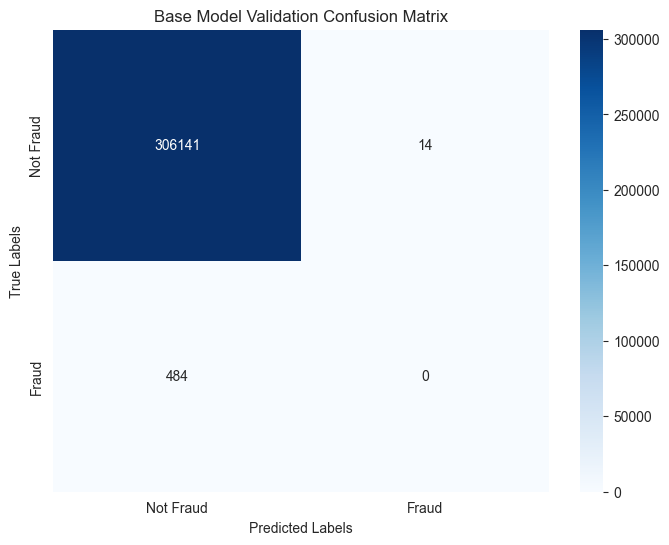

In [70]:
plot_confusion_heatmap(
    y_true=valid_labels,
    y_pred=valid_preds,
    class_names=["Not Fraud", "Fraud"],
    title="Base Model Validation Confusion Matrix",
    cmap="Blues"
)

In [ ]:
곱창났다!